Introduction
--------------

Image rendering is related to all and any of the techniques that are used to show an image to the user. This requires some conditioning of the image such as enhancing and restoring the image (if necessary) after noise removal or simply adapting the visualization of the image to the display that is available (for instance, we may require to change and smooth the image to make use of all the dynamics of a particular screen).

One of the main situations we encounter when rendering an image is a difference in the amount of bit encoding that we can use for an image. For instance, we may have an image that was encoded by an MRI or a CT using 15 bits but it was then converted into a JPG or PNG file and necessarily lost some information because of the reduction of bits used per pixel.

We will study here the effect that encoding can have in the rendering of an image by presenting the changes on the observed image at different bit encodings. 

We won't be working yet with a complete medical imaging (that will be covered after discussing DICOMs). We will directly open a medical image of the brain that was converted into a PNG and re-encode that image at different depths.

Python provides some tools (always growing) for image processing in the package **scikit-imag**. The module **scypi** also provides imaging processing tools.

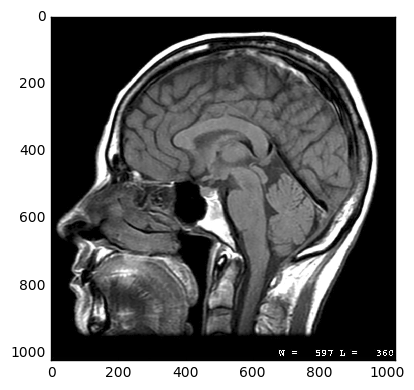

Original (8-bit encoding) the max is: 255


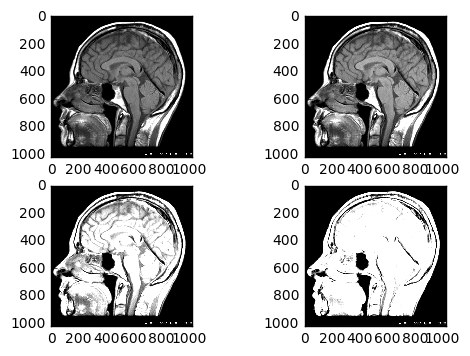

In [3]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#the simplest way to open and display an image uses the novice module from skimage
brainpic = novice.open('braincomplete.png')
brainpic.show()

#however, we will use instead the matplotlib image modules to obtain arrays that we can manipulate
#the 8-bit data in the PNG will be converted to floating point data between 0 and 1 by imread
#unless you ask it to Flatten=True
brainpicarray = mpimg.imread('braincomplete.png','True') 
print('Original (8-bit encoding) the max is: '+str(np.max(brainpicarray))) #showing max value in the image
bp=plt.subplot(221)
plt.imshow(brainpicarray)

#this here only adjust the reduction in coded bits in the image
Jm=exposure.rescale_intensity(brainpicarray,in_range=(0, 200)) #reducing encoding
Km=exposure.rescale_intensity(brainpicarray,in_range=(0, 100)) #reducing encoding
Lm=exposure.rescale_intensity(brainpicarray,in_range=(0, 50)) #reducing to 1 bit
plt.subplot(222)
plt.imshow(Jm)
plt.subplot(223)
plt.imshow(Km)
plt.subplot(224)
plt.imshow(Lm)


Where we can see that reducing the number of encoding bits reduces the dynamic of the image. We already see a difference in the aspect for the first image even though we used the 8-bit original encoding. Where is this coming from? (Tip: the normalization used by imshow takes care of some rendering if we do not!)

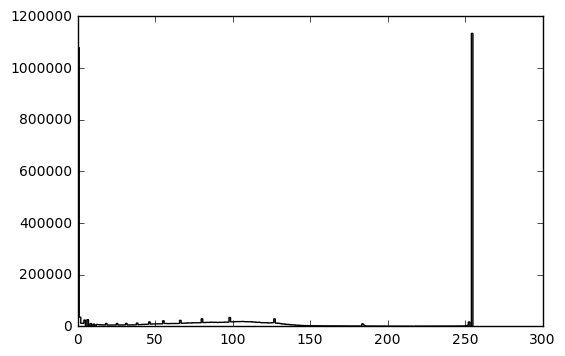

In [4]:
ht=plt.hist(brainpicarray.ravel(), bins=256, histtype='step', color='black')

The original histogram shows what we can already induce from the image: there are many very dark and very bright pixels. We can manipulate the histogram by proposing an equalization.

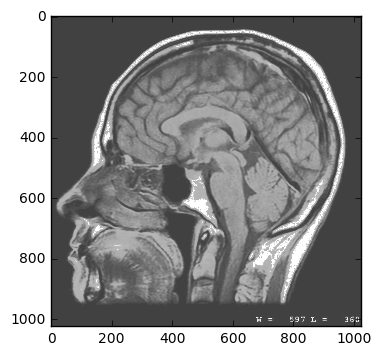

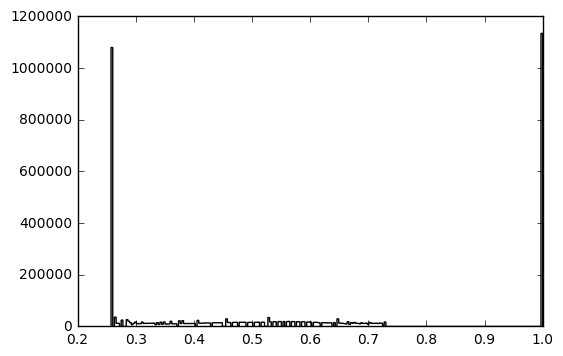

In [5]:
img_eq = exposure.equalize_hist(brainpicarray)
plt.figure()
plt.imshow(img_eq)
plt.figure()
ht=plt.hist(img_eq.ravel(), bins=256, histtype='step', color='black')

Or an equalization that takes the pixels in the percentiles 2% to 98% for the equalization.

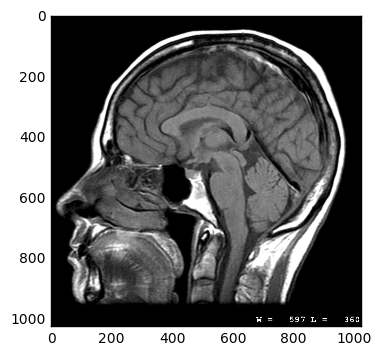

In [6]:
p2, p98 = np.percentile(brainpicarray, (2, 98))
img_eq2 = exposure.rescale_intensity(brainpicarray, in_range=(p2, p98))
plt.figure()
plt.imshow(img_eq2)

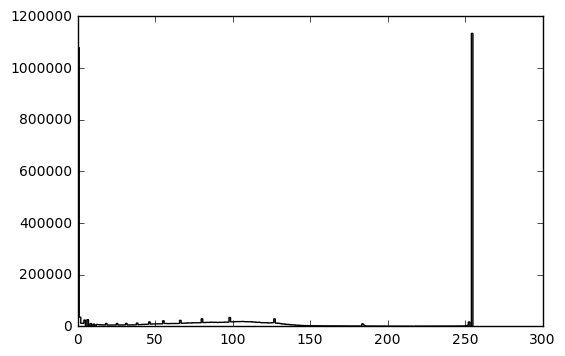

In [7]:
ht=plt.hist(img_eq2.ravel(), bins=256, histtype='step', color='black')

Or using an adaptive histogram equalization.

Right skew

The data in the above graph are right-skewed. Most of the sample values are clustered on the right side of the histogram. If its right-skewed, then that means its typically GREATER THAN the median.

A right skewed distribution is sometimes called a positive skew distribution. That’s because the tail is long on the positive direction of the number line.

C:\Users\Deepu\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


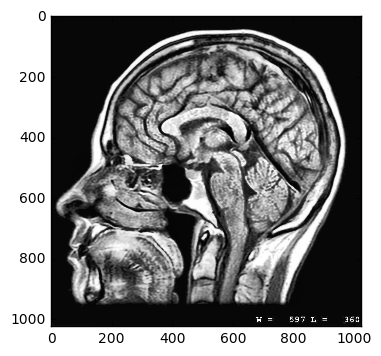

In [8]:
img_adapteq = exposure.equalize_adapthist(brainpicarray, clip_limit=0.03)
plt.figure()
plt.imshow(img_adapteq)

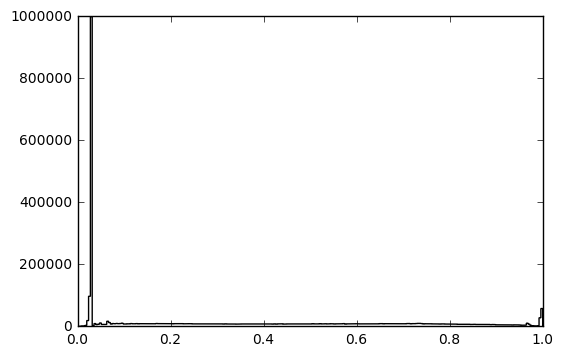

In [9]:
ht=plt.hist(img_adapteq.ravel(), bins=256, histtype='step', color='black')

Left skew

The data in the above graph is left-skewed. so it means its LESS THAN the median.

A left skewed distribution is sometimes called a negatively skewed distribution because it’s long tail is on the negative direction on a number line.


C:\Users\Deepu\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


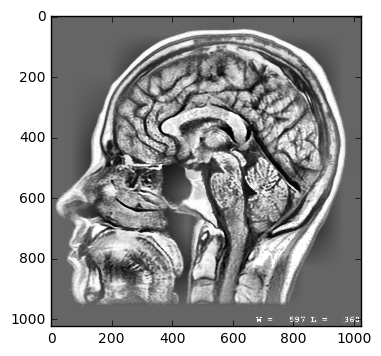

In [14]:
img_adapteqch = exposure.equalize_adapthist(brainpicarray, clip_limit=0.4)
plt.figure()
plt.imshow(img_adapteqch)

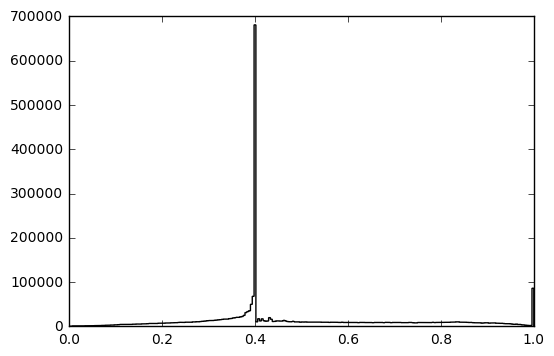

In [15]:
ht=plt.hist(img_adapteqch.ravel(), bins=256, histtype='step', color='black')

clip_limit : float: optional

Clipping limit, normalized between 0 and 1 (higher values give more contrast).

Initially the value is given is 0.03 the contrast is low and the peak appears along the value. Then the value is changed to 0.4 , it is more contrast and the peak appears along the 0.4 in histrogram value.

For 0.03 the contrast is low and for 0.4 the contrast is more. 

## Summary

In this example we analyze the impact of reducing the encoding bits in an image on the rendering to the user.

Your work for this example is:

* We have shown the histogram for the original image as well as the image after one equalization, but we did not show the histogram for the other two exmaples of histogram equalization: add the code to show the histograms in the code and run
* Modify the clip limit in the Adaptive histogram equalization and observe the changes, make a short discussion of the effect of this parameter in the Markdown for that section (one or two sentences)

Comments and corrections welcome!

References
---------------

* Tinku Acharya and Ajoy K. Ray, *Image Processing - Principles and Applications*. Wiley InterScience, 2006.